# Pandas `crosstab`

This is a notebook for the medium article [Summarizing data with Pandas crosstab](https://bindichen.medium.com/summarizing-data-with-pandas-crosstab-efc8b9abecf)

Please check out article for instructions

**License**: [BSD 2-Clause](https://opensource.org/licenses/BSD-2-Clause)


## Data

In [1]:
import pandas as pd

In [2]:
def load_data():
    return pd.read_csv('coffee_sales.csv', parse_dates=['order_date'])

In [3]:
df = load_data()
df.head()

,order_date,market,region,product_category,product,cost,inventory,net_profit,sales
0,2010-01-01,Wholesale,Central,Coffee,Amaretto,89,777,94,219
1,2010-01-01,Wholesale,Central,Coffee,Columbian,83,623,68,190
2,2010-01-01,Wholesale,Central,Coffee,Decaf Irish Cream,95,821,101,234
3,2010-01-01,Wholesale,Central,Tea,Green Tea,44,623,30,100
4,2010-01-01,Wholesale,Central,Espresso,Caffe Mocha,54,456,54,134


## 1. Creating a simple cross tabulation

In [4]:
pd.crosstab(df['region'], df['product_category'])

product_category,Coffee,Espresso,Herbal tea,Tea
region,,,,
Central,384,288,336,336
East,168,240,216,264
South,192,288,192,0
West,312,360,312,360


In [5]:
pd.crosstab(
    df['region'], 
    df['product_category'], 
    rownames=['US Region'], 
    colnames=['Product Category']
)

Product Category,Coffee,Espresso,Herbal tea,Tea
US Region,,,,
Central,384,288,336,336
East,168,240,216,264
South,192,288,192,0
West,312,360,312,360


## 2. Display multiple rows and columns

In [6]:
# multiple columns
pd.crosstab(
    df['region'], 
    [df['product_category'], df['market']]
)

product_category Coffee           Espresso           Herbal tea            \
market           Retail Wholesale   Retail Wholesale     Retail Wholesale   
region                                                                      
Central             192       192      144       144        144       192   
East                 72        96       96       144         72       144   
South               144        48      216        72        144        48   
West                240        72      288        72        240        72   

product_category    Tea            
market           Retail Wholesale  
region                             
Central             168       168  
East                 96       168  
South                 0         0  
West                288        72

In [7]:
# multiple columns with custom labels
pd.crosstab(
    df['region'], 
    [df['product_category'], df['market']],
    rownames=['US Region'], 
    colnames=['Product Category', 'Market']
)

Product Category Coffee           Espresso           Herbal tea            \
Market           Retail Wholesale   Retail Wholesale     Retail Wholesale   
US Region                                                                   
Central             192       192      144       144        144       192   
East                 72        96       96       144         72       144   
South               144        48      216        72        144        48   
West                240        72      288        72        240        72   

Product Category    Tea            
Market           Retail Wholesale  
US Region                          
Central             168       168  
East                 96       168  
South                 0         0  
West                288        72

In [8]:
# multiple rows
pd.crosstab(
    [df['region'], df['market']], 
    df['product_category']
)

product_category   Coffee  Espresso  Herbal tea  Tea
region  market                                      
Central Retail        192       144         144  168
        Wholesale     192       144         192  168
East    Retail         72        96          72   96
        Wholesale      96       144         144  168
South   Retail        144       216         144    0
        Wholesale      48        72          48    0
West    Retail        240       288         240  288
        Wholesale      72        72          72   72

## 3. Adding rows/columns subtotals

In [9]:
pd.crosstab(df['region'], df['product_category'], margins = True)

product_category,Coffee,Espresso,Herbal tea,Tea,All
region,,,,,
Central,384,288,336,336,1344
East,168,240,216,264,888
South,192,288,192,0,672
West,312,360,312,360,1344
All,1056,1176,1056,960,4248


In [11]:
# custom name
pd.crosstab(
    df['region'], df['product_category'], 
    margins = True, 
    margins_name = 'Subtotals'
)

product_category,Coffee,Espresso,Herbal tea,Tea,Subtotals
region,,,,,
Central,384,288,336,336,1344
East,168,240,216,264,888
South,192,288,192,0,672
West,312,360,312,360,1344
Subtotals,1056,1176,1056,960,4248


## 4. Getting the percentage of occurs with `normalize`

In [12]:
pd.crosstab(df['region'], df['product_category'], normalize = True)

product_category,Coffee,Espresso,Herbal tea,Tea
region,,,,
Central,0.090395,0.067797,0.079096,0.079096
East,0.039548,0.056497,0.050847,0.062147
South,0.045198,0.067797,0.045198,0.000000
West,0.073446,0.084746,0.073446,0.084746


In [13]:
# formatted with a percent sign (%)
pd.crosstab(
    df['region'], 
    df['product_category'], 
    normalize = True
).style.format('{:.2%}')

product_category,Coffee,Espresso,Herbal tea,Tea
region,,,,
Central,9.04%,6.78%,7.91%,7.91%
East,3.95%,5.65%,5.08%,6.21%
South,4.52%,6.78%,4.52%,0.00%
West,7.34%,8.47%,7.34%,8.47%


In [24]:
# margins = True, and formatted with a percent sign (%)
pd.crosstab(
    df['region'], 
    df['product_category'], 
    margins = True, 
    normalize = True
).style.format('{:.2%}')

product_category,Coffee,Espresso,Herbal tea,Tea,All
region,,,,,
Central,9.04%,6.78%,7.91%,7.91%,31.64%
East,3.95%,5.65%,5.08%,6.21%,20.90%
South,4.52%,6.78%,4.52%,0.00%,15.82%
West,7.34%,8.47%,7.34%,8.47%,31.64%
All,24.86%,27.68%,24.86%,22.60%,100.00%


In [14]:
# margins = index, and formatted with a percent sign (%)
pd.crosstab(
    df['region'], 
    df['product_category'], 
    margins = True, 
    normalize = 'index'
).style.format('{:.2%}')

product_category,Coffee,Espresso,Herbal tea,Tea
region,,,,
Central,28.57%,21.43%,25.00%,25.00%
East,18.92%,27.03%,24.32%,29.73%
South,28.57%,42.86%,28.57%,0.00%
West,23.21%,26.79%,23.21%,26.79%
All,24.86%,27.68%,24.86%,22.60%


In [15]:
# margins = columns, and formatted with a percent sign (%)
pd.crosstab(
    df['region'], 
    df['product_category'], 
    margins = True, 
    normalize = 'columns'
).style.format('{:.2%}')

product_category,Coffee,Espresso,Herbal tea,Tea,All
region,,,,,
Central,36.36%,24.49%,31.82%,35.00%,31.64%
East,15.91%,20.41%,20.45%,27.50%,20.90%
South,18.18%,24.49%,18.18%,0.00%,15.82%
West,29.55%,30.61%,29.55%,37.50%,31.64%


## 5. Performing aggregation

In [16]:
pd.crosstab(
    df['region'], 
    df['product_category'], 
    values = df['cost'],
    aggfunc = 'mean'
)

product_category,Coffee,Espresso,Herbal tea,Tea
region,,,,
Central,74.390625,89.666667,87.065476,87.690476
East,110.976190,95.600000,101.240741,46.962121
South,78.916667,62.305556,56.270833,NaN
West,90.814103,84.133333,98.987179,100.844444


In [17]:
# To round the result, we can call round():
pd.crosstab(
    df['region'], 
    df['product_category'], 
    values = df['cost'],
    aggfunc = 'mean'
).round(2)

product_category,Coffee,Espresso,Herbal tea,Tea
region,,,,
Central,74.39,89.67,87.07,87.69
East,110.98,95.60,101.24,46.96
South,78.92,62.31,56.27,NaN
West,90.81,84.13,98.99,100.84


## 6. Handling missing values

In [18]:
pd.crosstab(
    df['region'], 
    df['product_category'], 
    values = df['cost'],
    aggfunc = 'mean',
).fillna(0)

product_category,Coffee,Espresso,Herbal tea,Tea
region,,,,
Central,74.390625,89.666667,87.065476,87.690476
East,110.976190,95.600000,101.240741,46.962121
South,78.916667,62.305556,56.270833,0.000000
West,90.814103,84.133333,98.987179,100.844444


## 7. Visualization

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

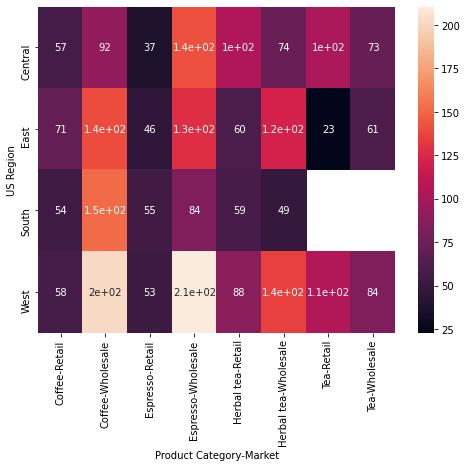

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    pd.crosstab(
        df['region'], 
        [df['product_category'], df['market']],
        rownames=['US Region'], 
        colnames=['Product Category', 'Market'],
        values = df['cost'],
        aggfunc = 'mean'
    ), 
    annot = True
)
plt.show()


### Thanks for reading

This is a notebook for the medium article [Summarizing data with Pandas crosstab](https://bindichen.medium.com/summarizing-data-with-pandas-crosstab-efc8b9abecf)

Please check out article for instructions

**License**: [BSD 2-Clause](https://opensource.org/licenses/BSD-2-Clause)